# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [59]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [60]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [61]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykbrgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [62]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
    

['setosa', 'versicolor', 'virginica']

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

<function matplotlib.pyplot.show(close=None, block=None)>

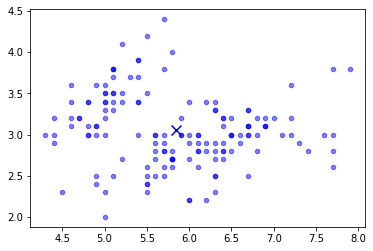

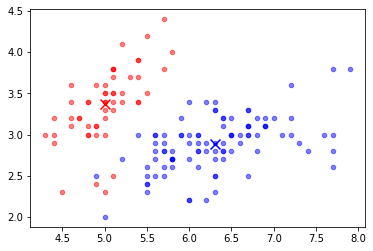

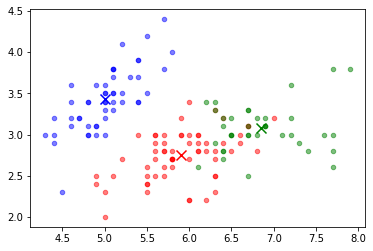

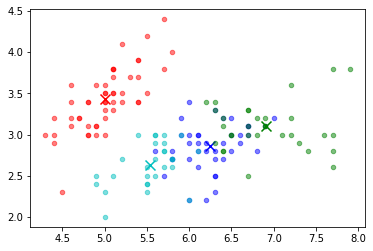

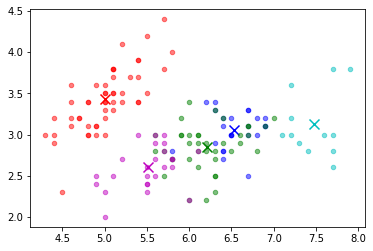

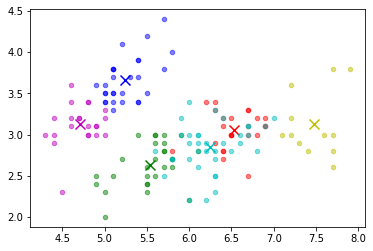

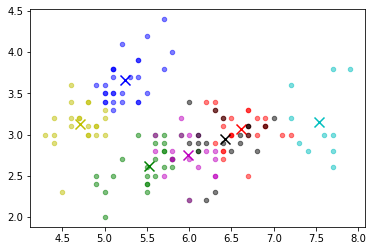

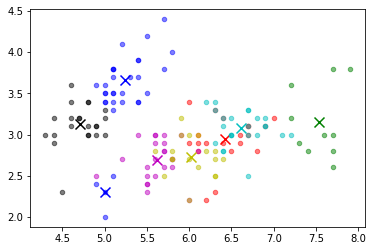

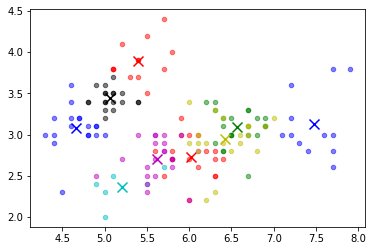

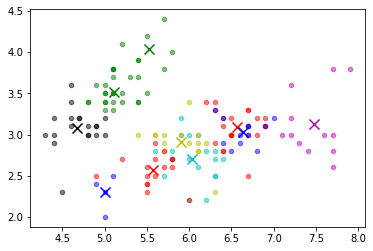

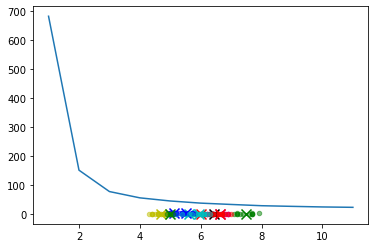

In [63]:
df=iris_data.data
X=iris_data.data
wcss = []
for i in range (1,12):
    kmeans =KMeans(n_clusters = i, init='k-means++',max_iter=300, n_init = 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    plt.figure()
    display_cluster(df, kmeans, i)

plt.plot(range(1,12),wcss)
plt.show

In [64]:
   Silhouette_score=dict()

2 is 0.6810461692117461
3 is 0.5511916046195915
4 is 0.49745518901737446
5 is 0.44283510635612705
6 is 0.45648535112758015
7 is 0.45553677444216323
8 is 0.3450943772981409
9 is 0.33414374531718455
10 is 0.32354083470567013
11 is 0.32250199248109784
12 is 0.31828392220248464
{'KMEAN  best k = 2': 0.6810461692117461}


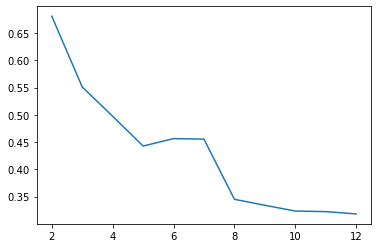

In [65]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics

array=np.ones(11)
for i in range(2,13):
    labels=cluster.KMeans(n_clusters = i, random_state=10, n_init = 1).fit(X).labels_
    array[i-2]=metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=10)
    
    ss=metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=10)
    
    print (str(i)+" is "+str(ss))
Silhouette_score[f'KMEAN  best k = {np.argmax(array)+2}']=np.max(array)
print(Silhouette_score)
plt.plot(range(2,13),array)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

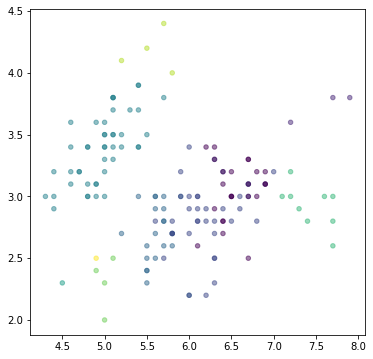

10


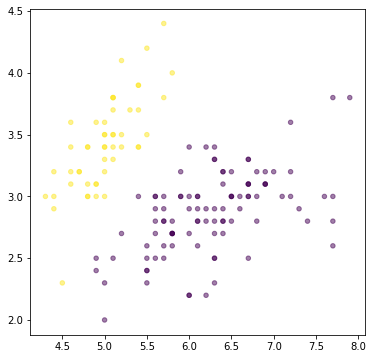

2


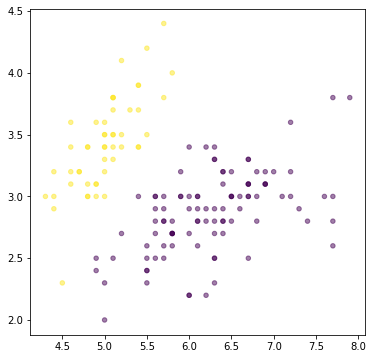

2


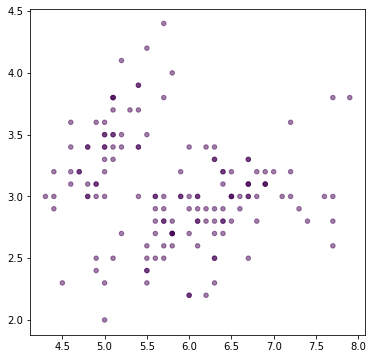

1


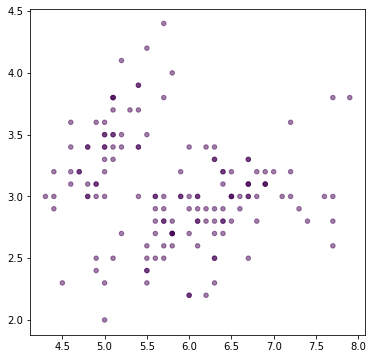

1


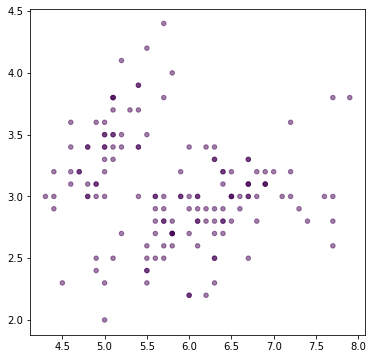

1


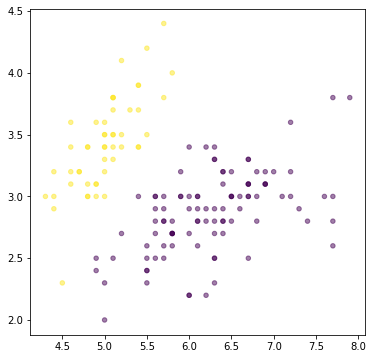

2


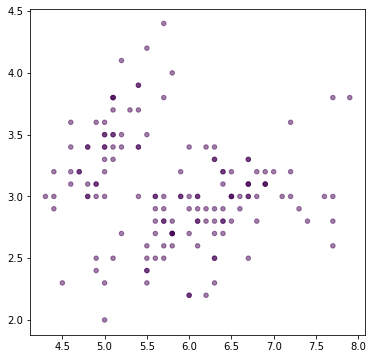

1


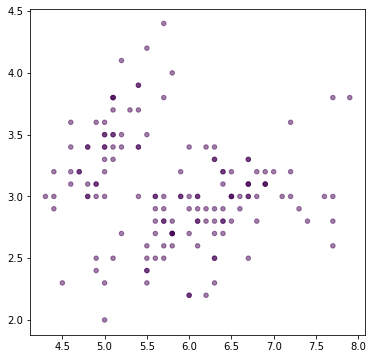

1


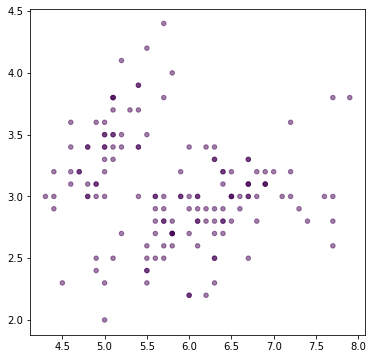

1


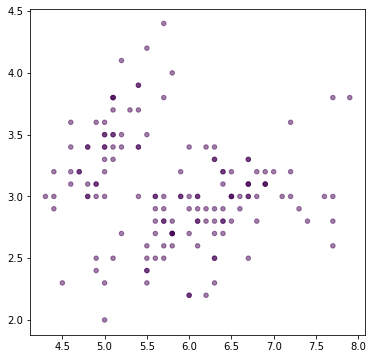

1


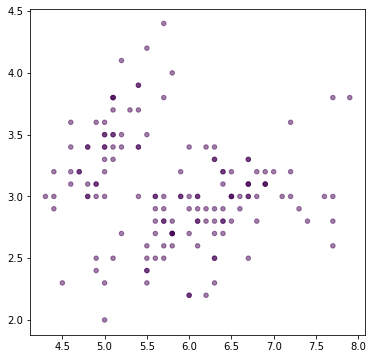

1


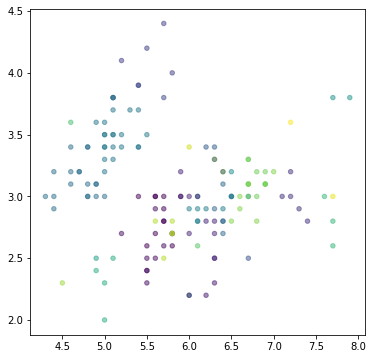

28


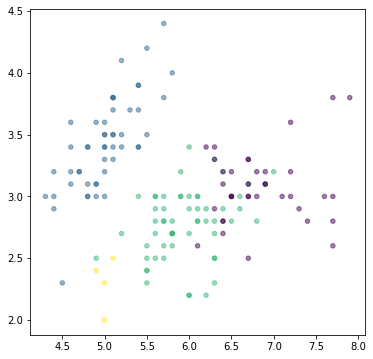

4


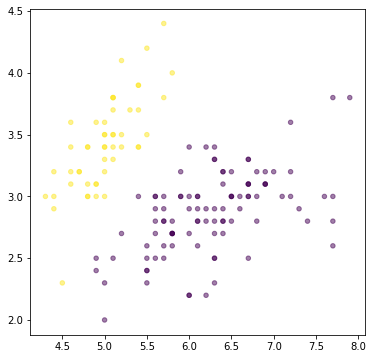

2


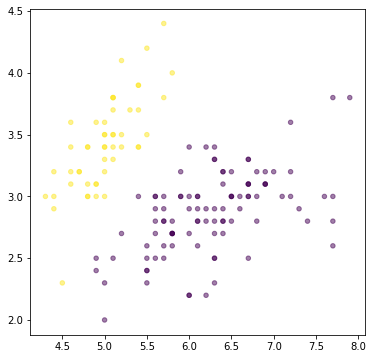

2


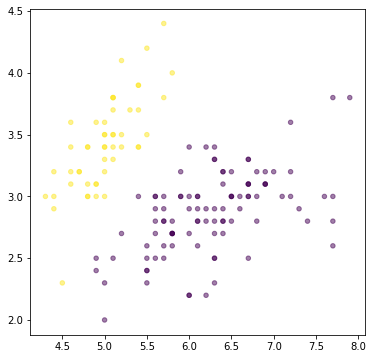

2


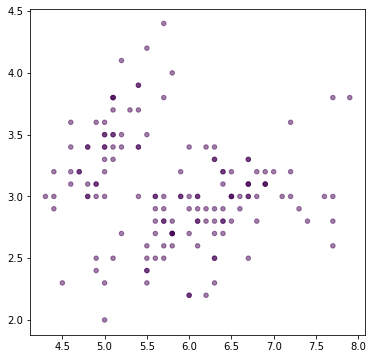

1


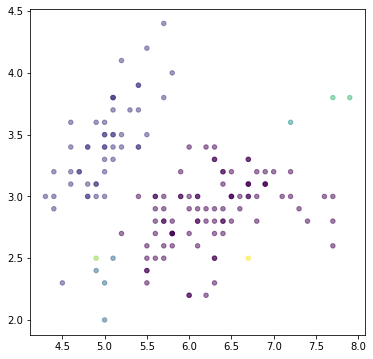

7


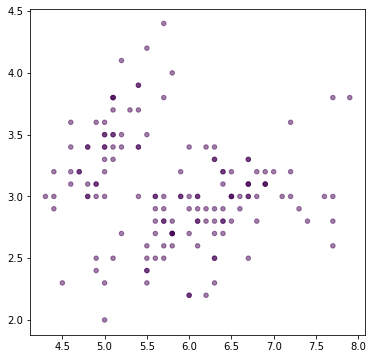

1


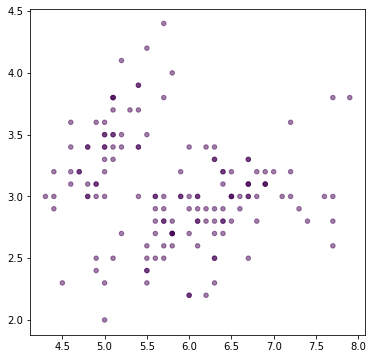

1


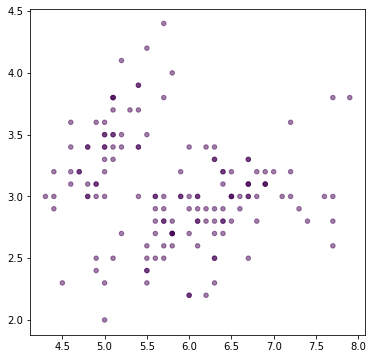

1


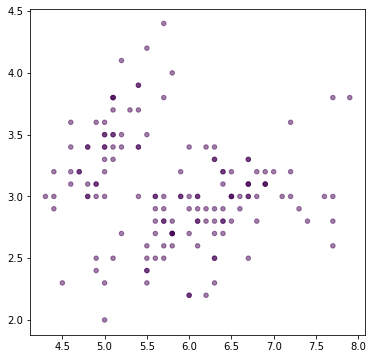

1


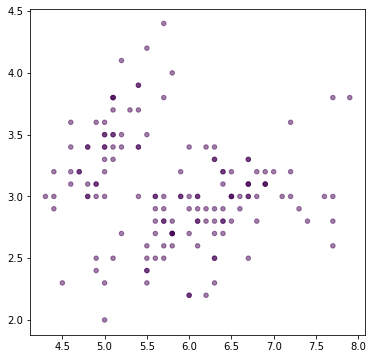

1


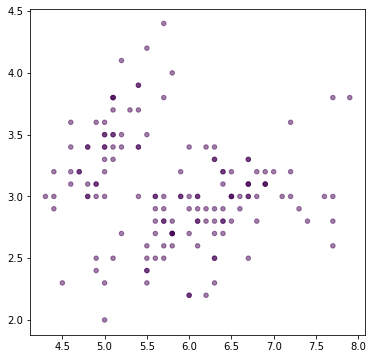

1


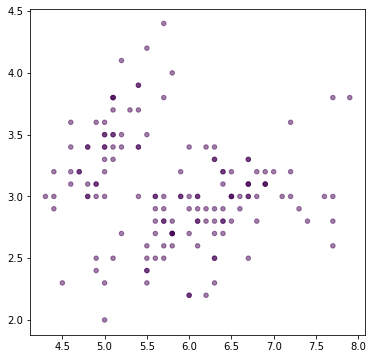

1


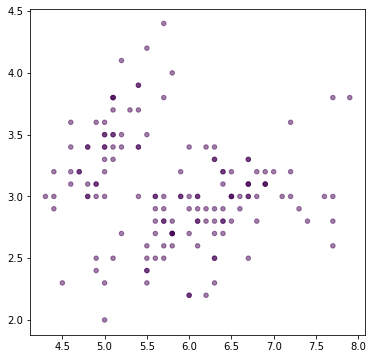

1


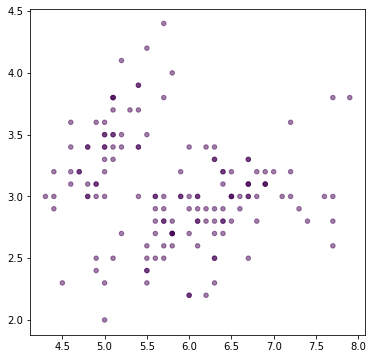

1


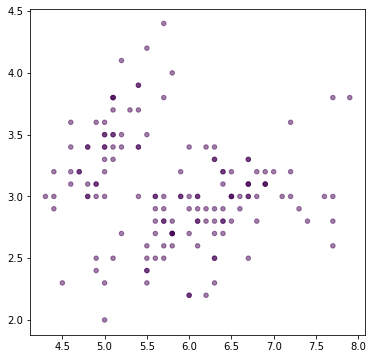

1


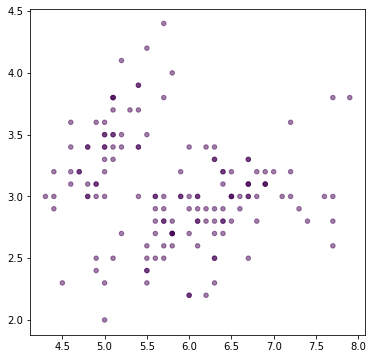

1


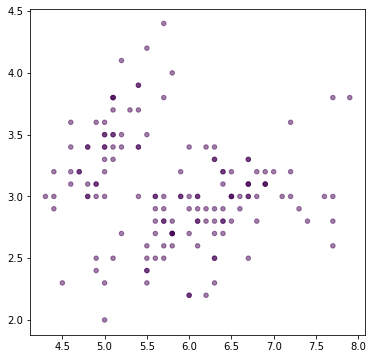

1


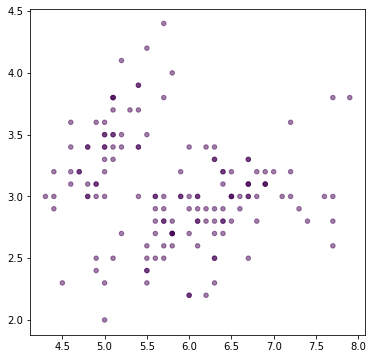

1


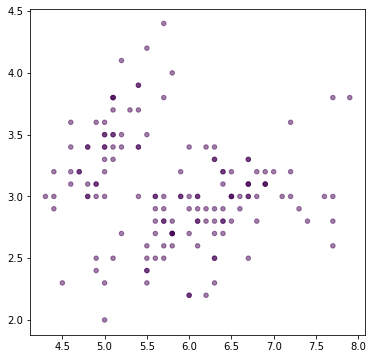

1


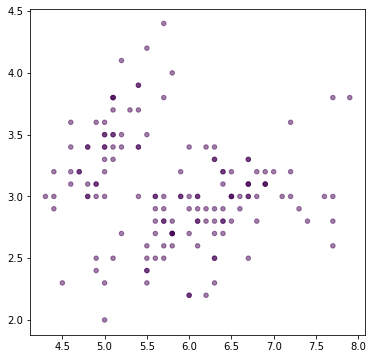

1


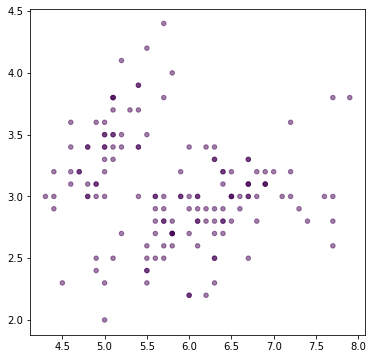

1


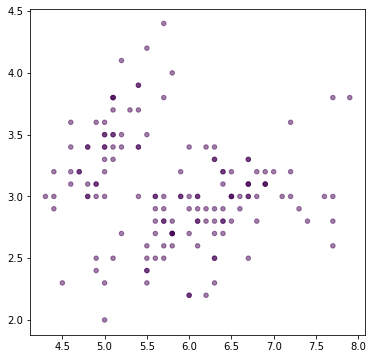

1


In [66]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

X_scaled = df

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs) 


Affinity=['euclidean', 'manhattan' , 'cosine']
Linkage=['average' , 'single']
dicty_dict=dict()
distance_threshold=[1,3,4,5,6,8]
for affin in Affinity:
    for link in Linkage:
        for dist in distance_threshold:
            aggloclust = AgglomerativeClustering(affinity=affin, compute_full_tree=True, connectivity=None,
                                             linkage=link, distance_threshold=dist, memory=None, n_clusters=None)
           
            plt.figure(figsize=(6, 6))
            plt.scatter(X_scaled[:, 0], df[:, 1], c=aggloclust.fit_predict(X_scaled), cmap='viridis', alpha=0.5,
                    s=20)
            plt.show()
            print(len(np.unique(aggloclust.fit(df).labels_)))
            if len(np.unique(aggloclust.fit(X_scaled).labels_)) > 1:
                sil = metrics.silhouette_score(X_scaled, aggloclust.fit_predict(X_scaled), metric=affin,
                                                          sample_size=1000, random_state=10)
            else :
                sil = 0
            dicty_dict[f'{aggloclust.fit(X_scaled).n_clusters_},{affin},{link},{dist}'] = sil
       

Silhouette_score[f'Hierarchal Clustering  best k & affin = {max(dicty_dict, key=dicty_dict.get)}'] = max(
    dicty_dict.values())


In [67]:
Silhouette_score

{'KMEAN  best k = 2': 0.6810461692117461,
 'Hierarchal Clustering  best k & affin = 2,euclidean,average,3': 0.6867350732769775}

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

no_of_clusters: 16
noise: 1337
v_measure = 0.1118597617815485
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
no_of_clusters: 22
noise: 939
v_measure = 0.32874475081271487
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
no_of_clusters: 14
noise: 702
v_measure = 0.4137463543088816
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
no_of_clusters: 12
noise: 522
v_measure = 0.3875410971968404
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6  7  8  9 10 11]
no_of_clusters: 7
noise: 411
v_measure = 0.4227252536345728
dbscan_cluster.labels_ [-1  0  1  2  3  4  5  6]
no_of_clusters: 6
noise: 292
v_measure = 0.3365736423940968
dbscan_cluster.labels_ [-1  0  1  2  3  4  5]
no_of_clusters: 3
noise: 213
v_measure = 0.36315194762724284
dbscan_cluster.labels_ [-1  0  1  2]
no_of_clusters: 2
noise: 150
v_measure = 0.30628255747701433
dbscan_cluster.labels_ [-1  0  1]
no_of_clusters: 2
noise: 104
v_measure = 0

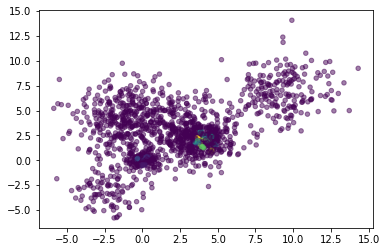

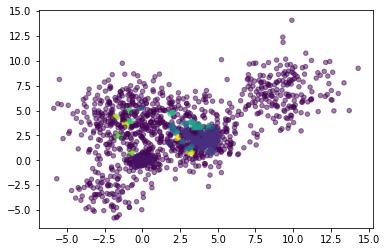

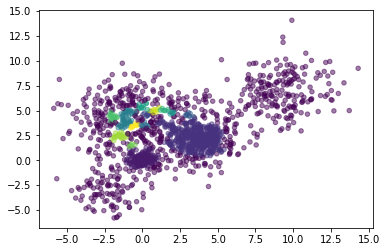

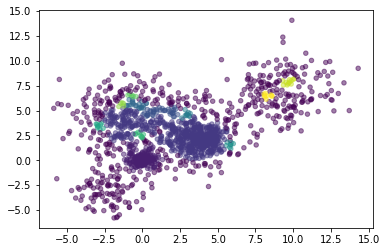

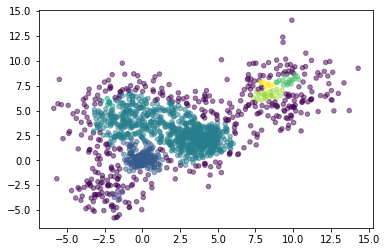

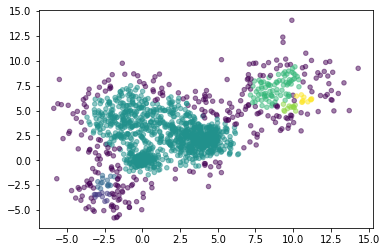

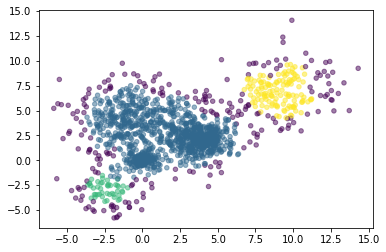

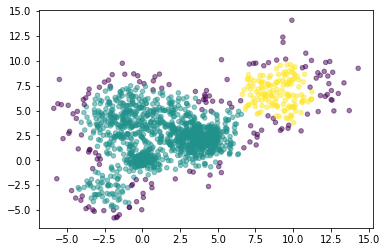

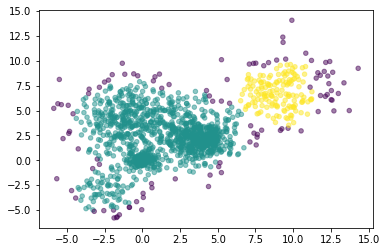

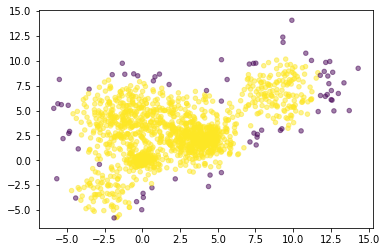

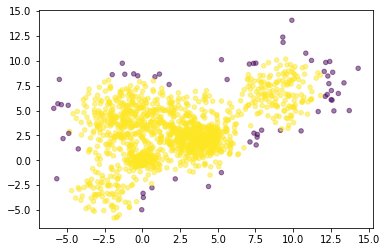

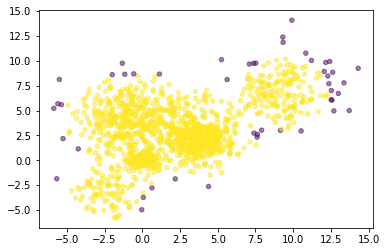

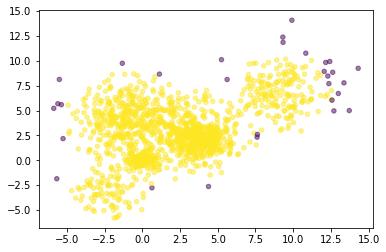

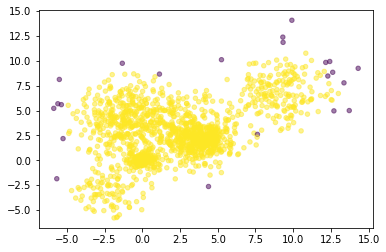

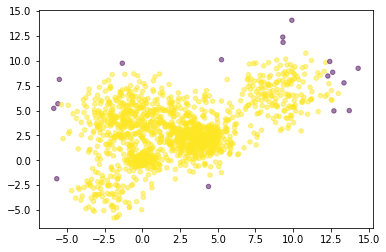

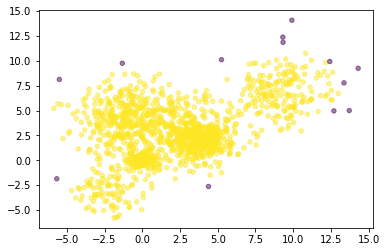

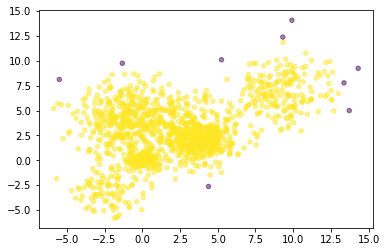

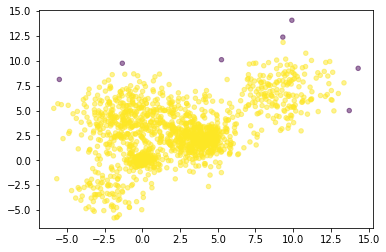

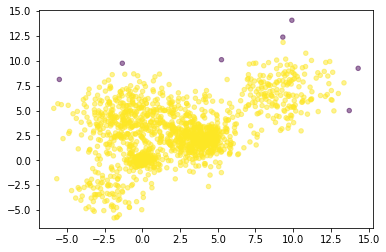

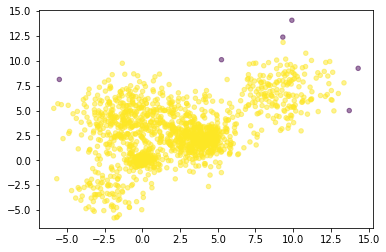

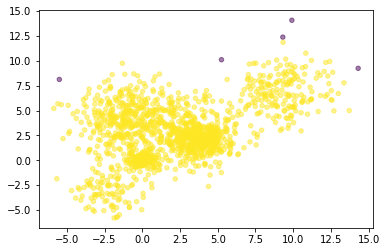

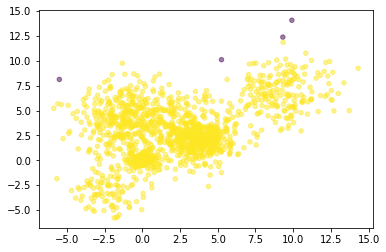

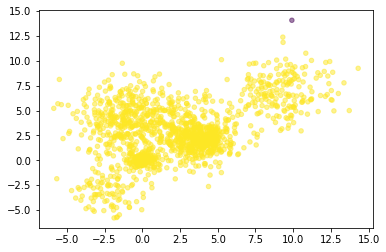

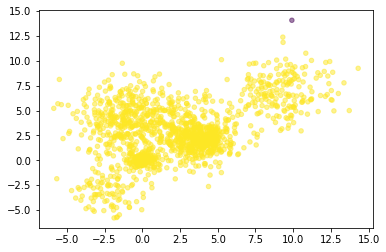

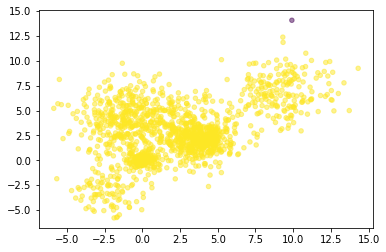

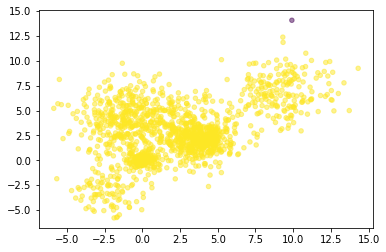

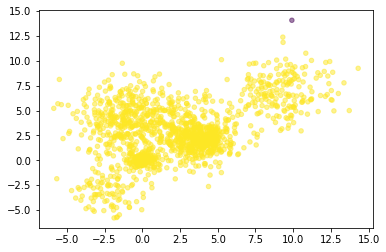

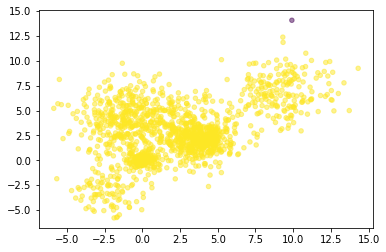

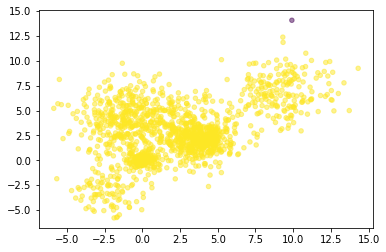

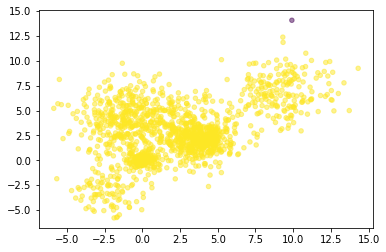

In [68]:
from sklearn.metrics import v_measure_score
def DBscan(EPS, Min_samples):
    cluster_stds=[1.4, 0.5, 1.8, 1.8, 0.9, 1.8]
    X, y = make_blobs(n_samples=[100, 150, 300, 400, 300, 200], n_features=2,cluster_std=cluster_stds,centers=[(-2, -3), (0, 0), (3, 2.5), (-1, 4), (4, 2), (9, 7)], shuffle=False, random_state=42)
    X_scaled = X
    dbscan_cluster = DBSCAN(eps=EPS, min_samples=Min_samples)
    dbscan_cluster.fit(X)
    plt.figure()
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_cluster.labels_, cmap='viridis', alpha=0.5, s=20)
    labels = dbscan_cluster.labels_
    No_cluster = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(dbscan_cluster.labels_).count(-1)
    print('no_of_clusters: %d' % No_cluster)
    print('noise: %d' % n_noise)
    print('v_measure =', v_measure_score(y, labels))
    print(f'dbscan_cluster.labels_ {np.unique(dbscan_cluster.labels_)}')
    return metrics.silhouette_score(X_scaled,dbscan_cluster.labels_,sample_size=1000,random_state=45)
first = 0.1
last = 3.1
step = 0.1
maximum_list= np.arange(first, last, step)
first2 = 5
last2 = 36
step2 = 1
Minimum_list= np.arange(first2, last2, step2)
dbscan_array=np.ones(30)
for z in range(0,30):
    dbscan_array[z]=DBscan(maximum_list[z], Minimum_list[z])
    

22 0.5308329596847611


{'KMEAN  best k = 2': 0.6810461692117461,
 'Hierarchal Clustering  best k & affin = 2,euclidean,average,3': 0.6867350732769775,
 'DBScan with eps = 2.3000000000000003 and Min_samples =27': 0.5308329596847611}

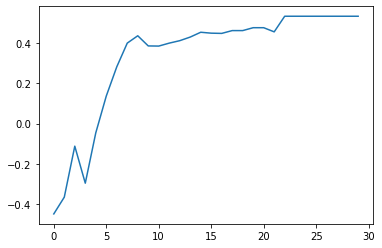

In [69]:
plt.plot(range(0, len(dbscan_array)),dbscan_array)
Silhouette_score[f'DBScan with eps = {maximum_list[np.argmax(dbscan_array)]} and Min_samples ={Minimum_list[np.argmax(dbscan_array)]}']=np.max(dbscan_array)
print(np.argmax(dbscan_array), np.max(dbscan_array))
Silhouette_score

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
6* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

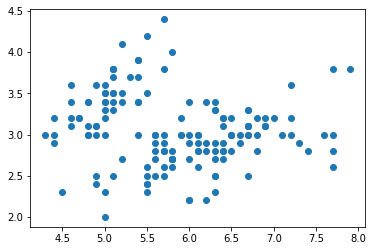

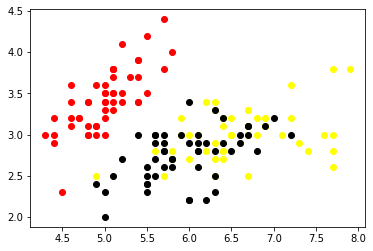

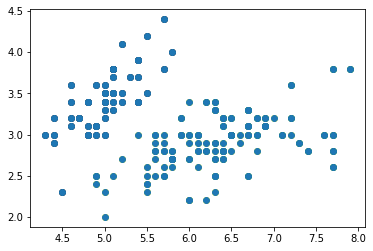

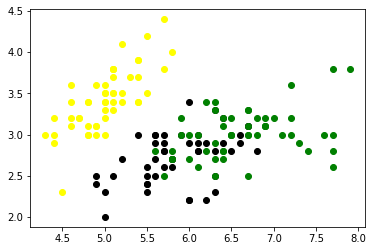

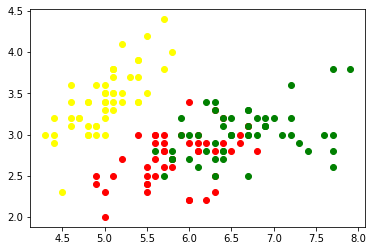

In [70]:
from scipy.stats import multivariate_normal
data = pd.DataFrame(df)
plt.scatter(data[0], data[1])
gmm = GaussianMixture(n_components = 3,covariance_type='tied').fit(data)
data['labels']= gmm.predict(data)
x0 = data[data['labels']== 0]
x1 = data[data['labels']== 1]
x2 = data[data['labels']== 2]
plt.figure()
plt.scatter(x0[0], x0[1], c ='red')
plt.scatter(x1[0], x1[1], c ='yellow')
plt.scatter(x2[0], x2[1], c ='black')


gmm = GaussianMixture(n_components = 3,covariance_type='full').fit(data) 
data['labels']= gmm.predict(data)
y0 = data[data['labels']== 0]
y1 = data[data['labels']== 1]
y2 = data[data['labels']== 2]
plt.figure()
plt.scatter(y0[0], y0[1], c ='black')
plt.scatter(y1[0], y1[1], c ='yellow')
plt.scatter(y2[0], y2[1], c ='green')
plt.scatter(data[0], data[1])

gmm = GaussianMixture(n_components = 3,covariance_type='spherical').fit(data)
data['labels']= gmm.predict(data)
z0 = data[data['labels']== 0]
z1 = data[data['labels']== 1]
z2 = data[data['labels']== 2] 
plt.figure()
plt.scatter(z0[0], z0[1], c ='black')
plt.scatter(z1[0], z1[1], c ='yellow')
plt.scatter(z2[0], z2[1], c ='green')

gmm = GaussianMixture(n_components = 3,covariance_type='diag').fit(data) 
data['labels']= gmm.predict(data)
d0 = data[data['labels']== 0]
d1 = data[data['labels']== 1]
d2 = data[data['labels']== 2] 
plt.figure()
plt.scatter(d0[0], d0[1], c ='red')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='green')

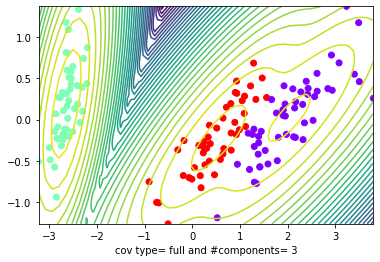

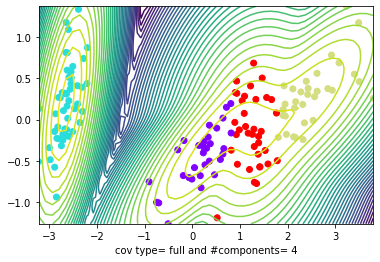

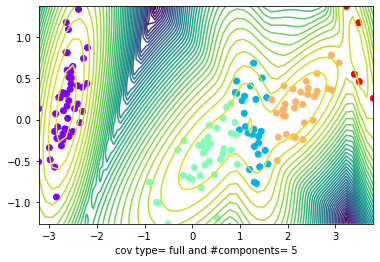

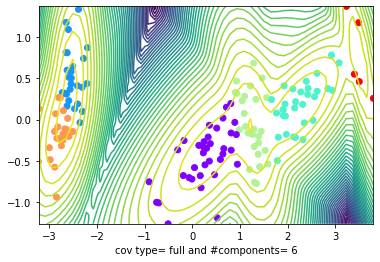

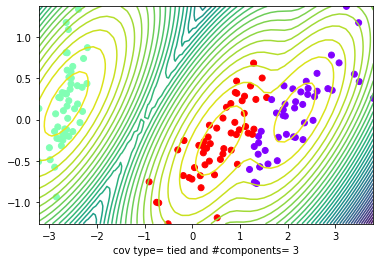

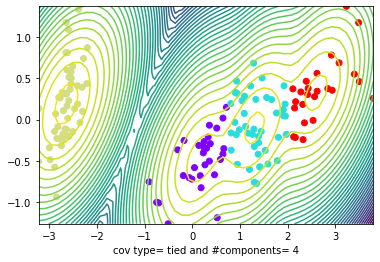

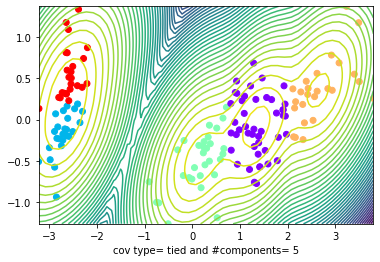

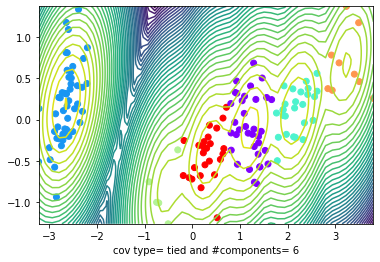

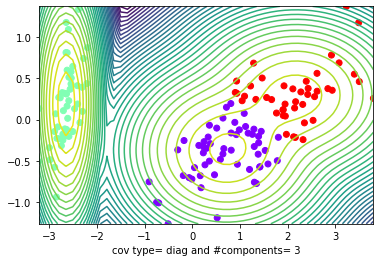

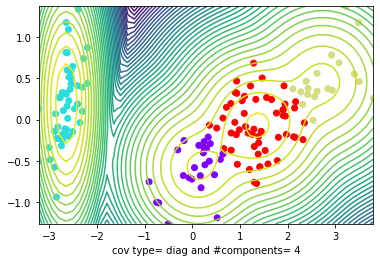

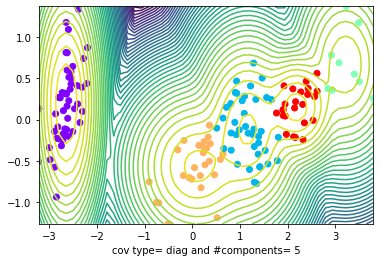

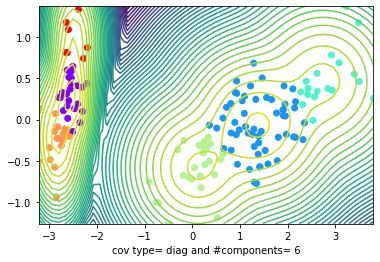

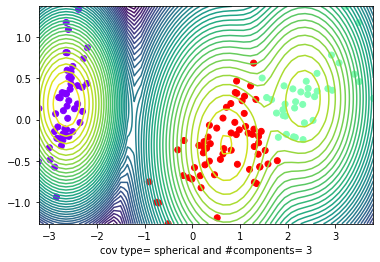

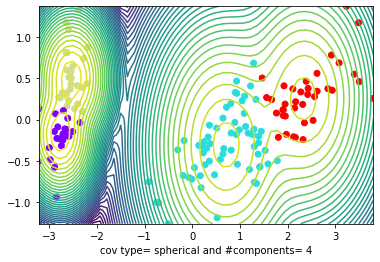

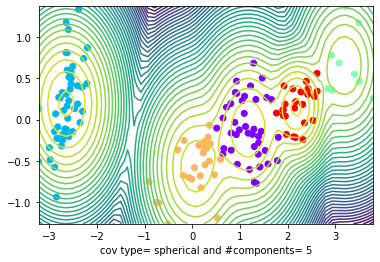

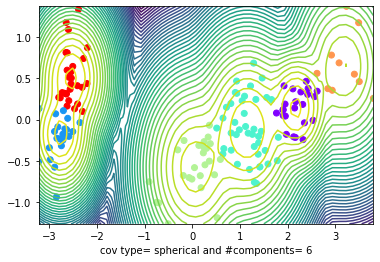

In [78]:
from sklearn.decomposition import PCA
cov = ["full","tied", "diag", "spherical"]
xlabel = []
silhouette_average = []
Num_com=[3,4,5,6]

pca = PCA(2)
X_=pca.fit_transform(pd.DataFrame(iris_data.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']))
for type_ in cov:
    for num_ in Num_com:
        gmm = GaussianMixture(n_components=num_, covariance_type=type_).fit(X_)
        labels = gmm.predict(X_)
        plt.figure()
        plt.xlabel(f"cov type= {type_} and #components= {num_}")
        plt.scatter(X_[:, 0], X_[:, 1], c=labels, cmap='rainbow')
        xmin = min(X_[:, 0])
        xmax = max(X_[:, 0])
        ymin = min(X_[:, 1])
        ymax = max(X_[:, 1])
        silhouette_avg = silhouette_score(X_, labels)
        silhouette_average.append(silhouette_avg)
        x = str(type_) + "," + str(num_)
        xlabel.append(x)

        X, Y = np.meshgrid(np.linspace(xmin, xmax), np.linspace(ymin, ymax))
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = gmm.score_samples(XX)
        Z = Z.reshape((50, 50))
        plt.contour(X, Y, Z, levels=40)
        
        plt.show()
best_sil = max(silhouette_average)
eps_min = xlabel[silhouette_average.index(best_sil)]

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes z


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 